In [63]:
import numpy as np
import pandas as pd

In [64]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [65]:
from wordcloud import WordCloud
import geopandas as gpd

In [66]:
mov = pd.read_csv('movies.csv',encoding='ISO-8859-1')

In [67]:
mov.head()

,Budget,Company,country,Director,Genre,Gross,Name,Rating,Released,Runtime,Score,Star,Votes,Writer,Year
0,8000000,Columbia Pictures Corporation,USA,Rob Reiner,Adventure,52287414,Stand by Me,R,22-08-1986,89,8.1,Wil Wheaton,299174,Stephen King,1986
1,6000000,Paramount Pictures,USA,John Hughes,Comedy,70136369,Ferris Bueller's Day Off,PG-13,11-06-1986,103,7.8,Matthew Broderick,264740,John Hughes,1986
2,15000000,Paramount Pictures,USA,Tony Scott,Action,179800601,Top Gun,PG,16-05-1986,110,6.9,Tom Cruise,236909,Jim Cash,1986
3,18500000,Twentieth Century Fox Film Corporation,USA,James Cameron,Action,85160248,Aliens,R,18-07-1986,137,8.4,Sigourney Weaver,540152,James Cameron,1986
4,9000000,Walt Disney Pictures,USA,Randal Kleiser,Adventure,18564613,Flight of the Navigator,PG,01-08-1986,90,6.9,Joey Cramer,36636,Mark H. Baker,1986


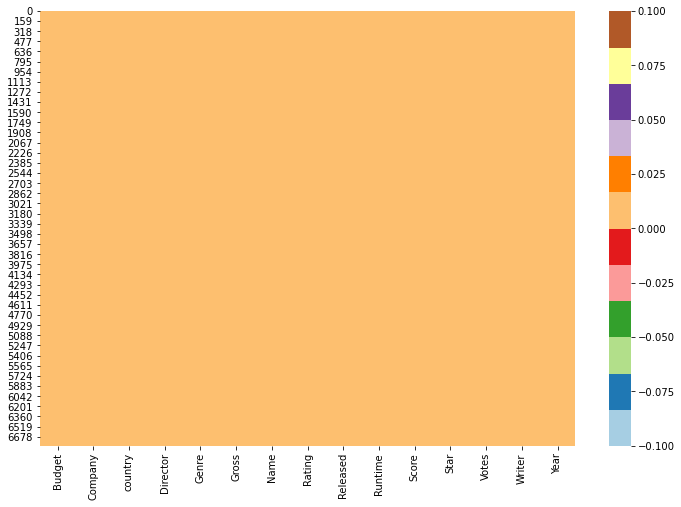

In [68]:
plt.figure(figsize=(12,8))
sns.heatmap(mov.isnull(), cmap='Paired') #no null values

In [69]:
mov.describe().T

,count,mean,std,min,25%,50%,75%,max
Budget,6820.0,2.458113e+07,3.702254e+07,0.0,0.00,11000000.0,32000000.00,300000000.0
Gross,6820.0,3.349783e+07,5.819760e+07,70.0,1515839.00,12135679.0,40065340.50,936662225.0
Runtime,6820.0,1.065513e+02,1.802818e+01,50.0,95.00,102.0,115.00,366.0
Score,6820.0,6.374897e+00,1.003142e+00,1.5,5.80,6.4,7.10,9.3
Votes,6820.0,7.121952e+04,1.305176e+05,27.0,7665.25,25892.5,75812.25,1861666.0
Year,6820.0,2.001000e+03,8.944501e+00,1986.0,1993.00,2001.0,2009.00,2016.0


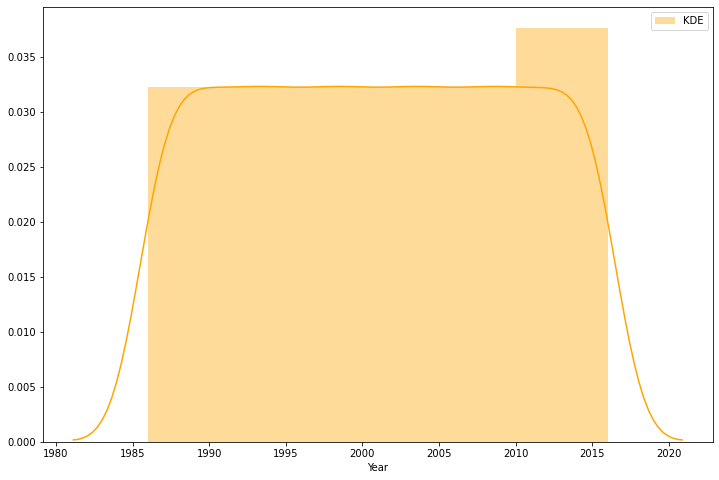

In [70]:
sns.distplot(mov['Year'], label='KDE', bins=5, color='orange')
plt.legend()
plt.gcf().set_size_inches(12,8)

In [71]:
Oldest = mov.sort_values("Year", ascending = True)
Oldest[['Name', 'Year']][:10]

,Name,Year
0,Stand by Me,1986
140,Bullies,1986
141,Biggles: Adventures in Time,1986
142,American Anthem,1986
143,Out of Bounds,1986
144,My Chauffeur,1986
145,Brighton Beach Memoirs,1986
146,Summer,1986
147,The Naked Cage,1986
148,Link,1986


In [72]:
Newest = mov.sort_values("Year", ascending = False)
Newest[['Name', 'Year']][:10]

,Name,Year
6819,From the Land of the Moon,2016
6668,Paris Can Wait,2016
6679,The Shallows,2016
6678,Horizonte profundo,2016
6677,El demonio neón,2016
6676,The Jungle Book,2016
6675,Los ilusionistas 2,2016
6674,Mike and Dave Need Wedding Dates,2016
6673,Warcraft: The Beginning,2016
6672,Nerve,2016


In [73]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
world.head(3)

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,920938,Oceania,Fiji,FJI,8374.0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,53950935,Africa,Tanzania,TZA,150600.0,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,603253,Africa,W. Sahara,ESH,906.5,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."


In [74]:
country_geo = list(world['name'])  
country_data = list(mov['country'].unique())

country_diff = [country for country in country_data if country not in country_geo]
country_diff

['USA',
 'UK',
 'West Germany',
 'Hong Kong',
 'Soviet Union',
 'Republic of Macedonia',
 'Federal Republic of Yugoslavia',
 'Aruba',
 'Czech Republic',
 'Malta']

In [75]:
mov['country']= pd.DataFrame(mov['country'].replace({'USA':'United States of America', 'UK':'United Kingdom',
                                                     'West Germany':'Germany','Hong Kong':'China',
                                                     'Soviet Union': 'Russia', 'Czech Republic':'Czech Rep.'}))

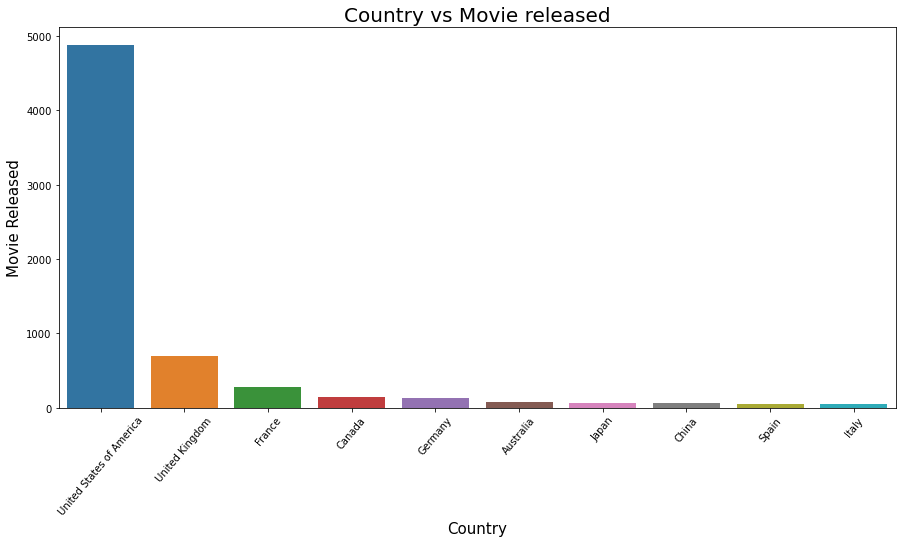

In [76]:
plt.figure(figsize=(15,7))
ten_countries = pd.DataFrame(mov['country'].value_counts()).head(10)
sns.barplot(x=ten_countries.index, y=ten_countries['country'])

plt.title('Country vs Movie released', fontsize=20)
plt.xlabel('Country', fontsize=15)
plt.ylabel('Movie Released', fontsize=15)
plt.xticks(ticks=[0,1,2,3,4,5,6,7,8,9],rotation='50')
plt.show()

In [77]:
from descartes.patch import PolygonPatch

In [78]:
Countries = pd.DataFrame(mov['country'].value_counts())
temp = Countries.index.to_frame(index=False, name='countries')
temp2 = Countries.reset_index(drop = True)
temp2 = temp2.rename(columns={'country':'Total_Movies'})
temp3 = temp.join(temp2)

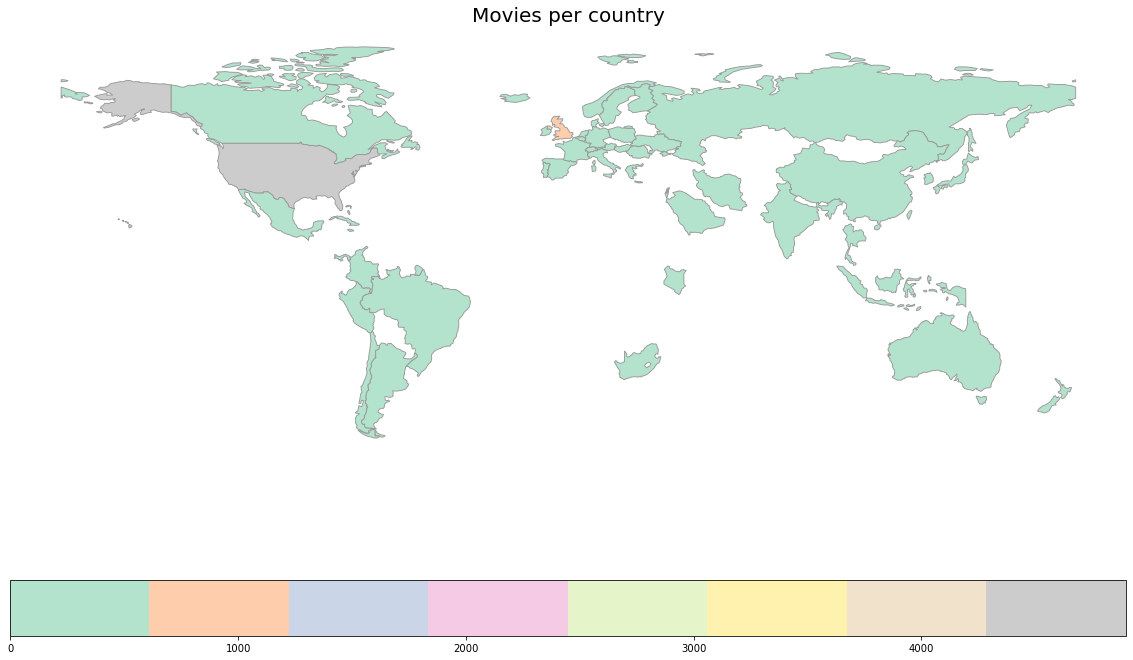

In [79]:
mapped = world.set_index('name').join(temp3.set_index('countries')).reset_index()

to_be_mapped='Total_Movies'
vmin, vmax = 0,4900
fig, ax= plt.subplots(1, figsize=(20,15))

mapped.dropna().plot(column=to_be_mapped, cmap='Pastel2', linewidth=0.9, ax=ax, edgecolors='0.6')
ax.set_title('Movies per country', fontdict={'fontsize': 20})
ax.set_axis_off()

sm=plt.cm.ScalarMappable(cmap='Pastel2', norm=plt.Normalize(vmin=vmin, vmax=vmax))
sm._A=[]
cbar=fig.colorbar(sm, orientation='horizontal')

In [80]:
mov.groupby('Company').size()

Company
"DIA" Productions GmbH & Co. KG    1
1+2 Seisaku Iinkai                 1
101st Street Films                 1
10th Hole Productions              1
120 Films                          1
                                  ..
Zucker Brothers Productions        1
double A Films                     1
erbp                               1
i5 Films                           1
micro_scope                        1
Length: 2179, dtype: int64

In [81]:
company = mov['Company'].value_counts()
company = pd.DataFrame(company)
company = company.head(10)
company.head(3)

,Company
Universal Pictures,302
Warner Bros.,294
Paramount Pictures,259


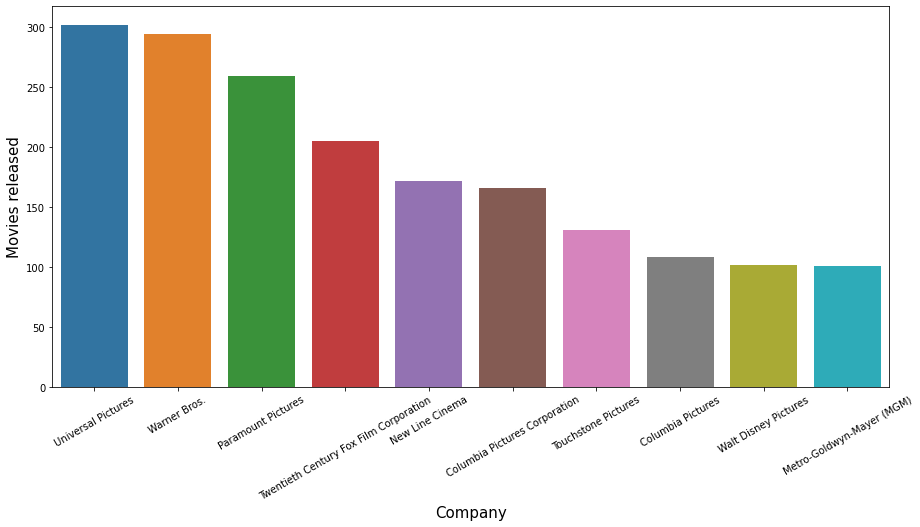

In [82]:
plt.figure(figsize=(15,7))
sns.barplot(x= company.index, y=company['Company'])
plt.xlabel('Company', fontsize=15)
plt.ylabel('Movies released', fontsize=15)
plt.xticks(ticks=[0,1,2,3,4,5,6,7,8,9], rotation='30')
plt.show()

In [83]:
#percentage of contribution of top 10 companies from the movie industry

company.sum()/mov.shape[0]*100

Company    26.979472
dtype: float64

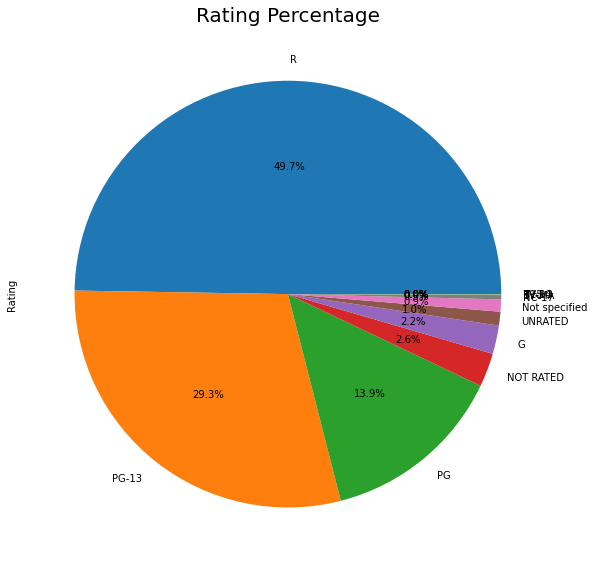

In [84]:
mov['Rating'].value_counts().plot.pie(autopct = '%1.1f%%',figsize=(15,8))
plt.title('Rating Percentage', fontsize='20')
plt.tight_layout()
plt.show()

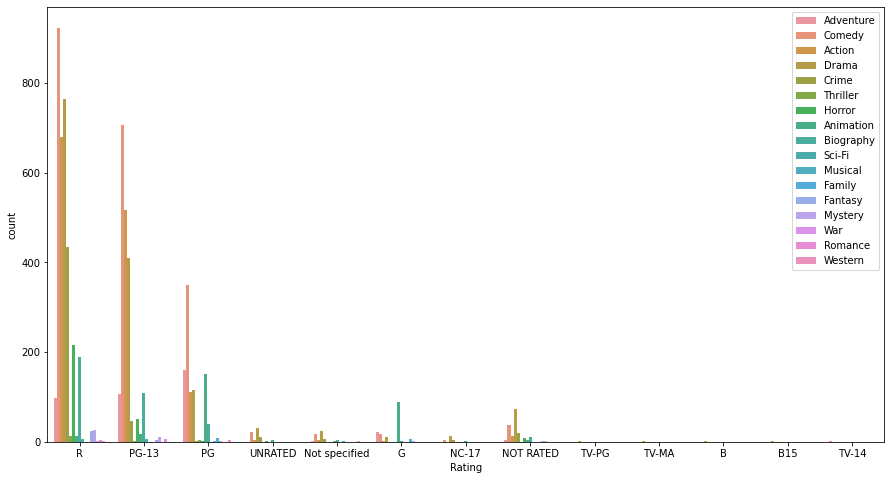

In [85]:
plt.figure(figsize=(15,8))
sns.countplot(x='Rating', data=mov, hue='Genre')
plt.legend(loc='upper right')

Text(0.5, 1.0, 'CORRELATION')

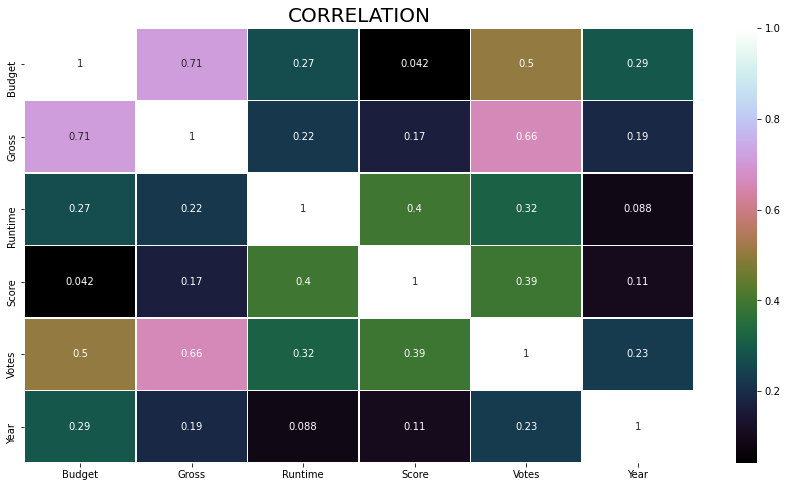

In [86]:
plt.figure(figsize=(15,8))
sns.heatmap(mov.corr(), annot=True, linewidth = 0.5, cmap='cubehelix')
plt.title('CORRELATION', fontsize='20')

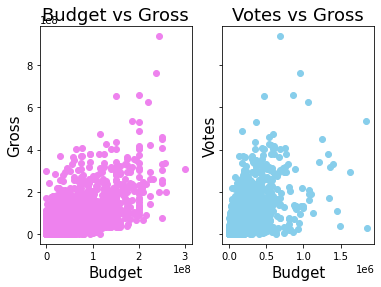

In [87]:

f,(ax1, ax2)=plt.subplots(1,2, sharey = True)

ax1.scatter(mov.Budget, mov.Gross, c='violet')
ax1.set_xlabel('Budget', fontsize=15)
ax1.set_ylabel('Gross', fontsize=15)
ax1.set_title('Budget vs Gross', fontsize=18)

ax2.scatter(mov.Votes, mov.Gross, c='skyblue')
ax2.set_xlabel('Budget', fontsize=15)
ax2.set_ylabel('Votes', fontsize=15)
ax2.set_title('Votes vs Gross', fontsize=18)

plt.show()

(-0.5, 1919.5, 1079.5, -0.5)

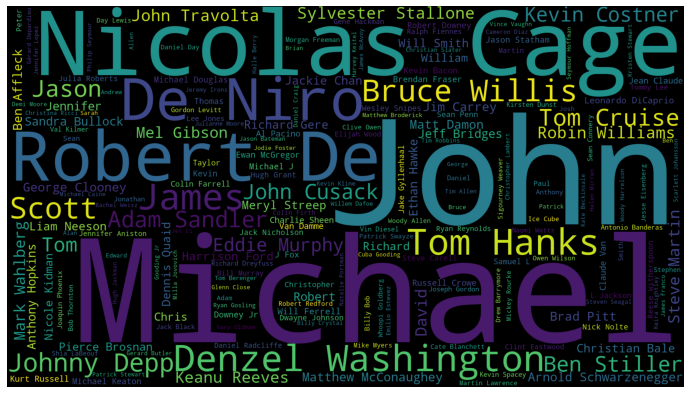

In [88]:
plt.subplots(figsize=(15,7))
wc= WordCloud(
                background_color='black',
                width=1920,
                height=1080).generate(" ".join(mov.Star))
plt.imshow(wc)
plt.axis('off')

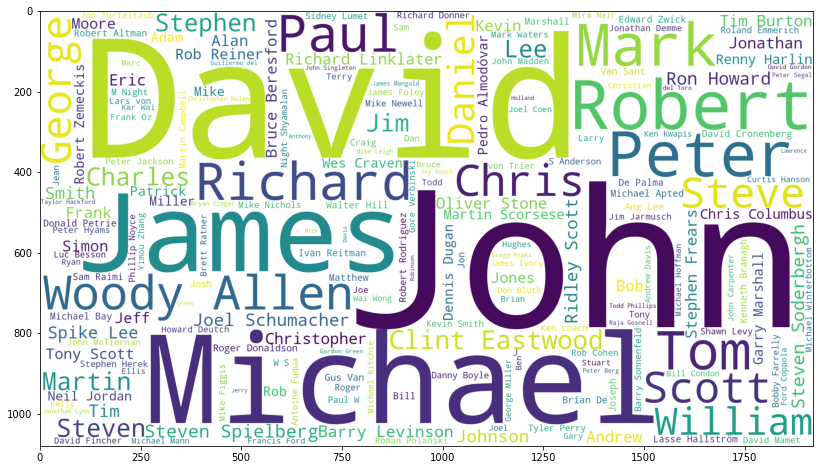

In [89]:
plt.subplots(figsize=(15,8))
wordcloud=WordCloud( background_color='White', width=1920, height=1080).generate(" ".join(mov.Director))
plt.imshow(wordcloud) #wordcloud of movie directors

In [90]:
import plotly.figure_factory as ff

In [91]:
a = mov['Runtime'].fillna(0.0).astype(float)
fig = ff.create_distplot([a], ['Runtime'], bin_size=0.8, curve_type='normal',colors=["#6ad49b"])
fig.update_layout(title_text='Movie Runtime Distribuition Plot')
fig.show()

In [92]:
b=mov['Score'].fillna(0.0).astype(float)
fug= ff.create_distplot([b], ['Score'], bin_size=0.1, curve_type='normal', colors=["#6ad49b"])
fug.update_layout(title_text='Movie Score Plot')
fug.show()

In [ ]:
THANK YO :))))